In [1]:
import gudhi
import matplotlib.pyplot as plot
import numpy as np
from DensiTDA import alphatools 
from numpy import genfromtxt
from DensiTDA import alphatools 

In [2]:
V = np.array(genfromtxt('datasets/confland2.csv', delimiter=','))
n = len(V)

In [3]:
len(V)

20232

In [4]:
P = np.zeros((n,1))
S = V
alpha = 0.35**2
D = 6

In [5]:
my_alpha_complex = alphatools.compute_alpha_complex(S, P, alpha, D)

Generating 1-Dimensional Weighted Cech Complex


100%|███████████████████████████████████████████| 21/21 [01:53<00:00,  5.39s/it]


	Total Edges of Cech Graph:  458184
	Highest Degree of Cech Graph:  81
	Number of Connected Components:  1
Begin Computing Alpha Complex
Preprocessing Dual Matrices:  20232


100%|███████████████████████████████████████████| 21/21 [05:53<00:00, 16.84s/it]


*********** BEGIN DIMENSION 0 ***********
	Possible Facets:  20232


100%|██████████████████████████████████| 20232/20232 [00:01<00:00, 17157.10it/s]


	Final Number of Facets:  20232
*********** BEGIN DIMENSION 1 ***********
	Possible Facets:  458184


100%|████████████████████████████████| 458184/458184 [00:21<00:00, 21339.45it/s]


	Final Number of Facets:  228072
*********** BEGIN DIMENSION 2 ***********
Estimating Number of Facets for dimension  2
	Possible Facets:  691296


100%|████████████████████████████████| 691296/691296 [00:34<00:00, 20235.86it/s]


	Final Number of Facets:  608928
*********** BEGIN DIMENSION 3 ***********
Estimating Number of Facets for dimension  3
	Possible Facets:  4625832


100%|██████████████████████████████| 4625832/4625832 [03:49<00:00, 20185.15it/s]


	Final Number of Facets:  665208
*********** BEGIN DIMENSION 4 ***********
Estimating Number of Facets for dimension  4
	Possible Facets:  1426440


100%|██████████████████████████████| 1426440/1426440 [01:12<00:00, 19734.51it/s]


	Final Number of Facets:  345888
*********** BEGIN DIMENSION 5 ***********
Estimating Number of Facets for dimension  5
	Possible Facets:  272544


100%|████████████████████████████████| 272544/272544 [00:13<00:00, 19528.12it/s]


	Final Number of Facets:  92040
*********** BEGIN DIMENSION 6 ***********
Estimating Number of Facets for dimension  6
	Possible Facets:  23952


100%|██████████████████████████████████| 23952/23952 [00:01<00:00, 19003.31it/s]

	Final Number of Facets:  10272


In [6]:
# In the paper, it has (20232, 228072, 608928, 665208, 345888, 92040, 10272)

In [7]:
filtration = []
for d in range(D + 1):
    filtration += my_alpha_complex[d]

In [8]:
example2 = gudhi.SimplexTree()
for d in range(D + 1):
    for facet, val in my_alpha_complex[d]:
        example2.insert(facet, filtration=val)
        
my_persistence = example2.persistence(homology_coeff_field = 2)

/var/folders/tr/3zw9td7531z0_hhwc8105rv00000gn/T/ipykernel_82796/2366749736.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [9]:
betti_numbers = {}
for i in range(D):
    betti_numbers[i] = 0
for bar, bd in my_persistence:
    if bd[1] > 10000: 
        betti_numbers[bar] += 1

In [10]:
betti_numbers

{0: 1, 1: 6, 2: 11, 3: 6, 4: 0, 5: 0}

/opt/anaconda3/envs/densitda/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning:

This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.

/opt/anaconda3/envs/densitda/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning:

There are 376237 intervals given as input, whereas max_intervals is set to 20000.



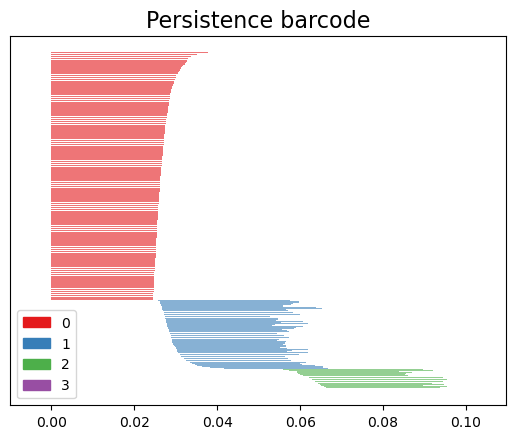

In [11]:
gudhi.plot_persistence_barcode(my_persistence, legend=True)
plot.show()

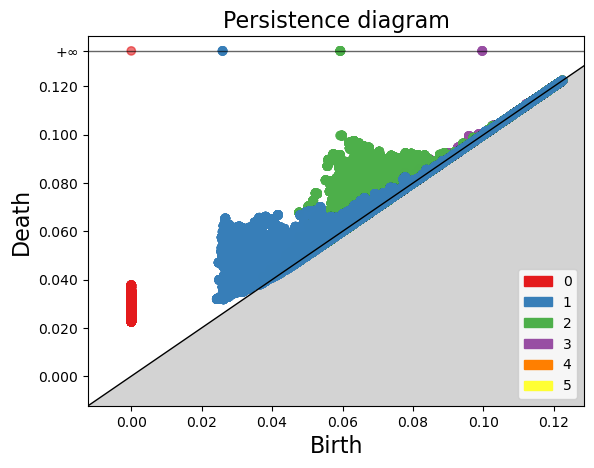

In [12]:
gudhi.plot_persistence_diagram(my_persistence, legend=True)
plot.show()

/opt/anaconda3/envs/densitda/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:85: UserWarning:

There are 376213 intervals given as input, whereas max_intervals is set to 1000.



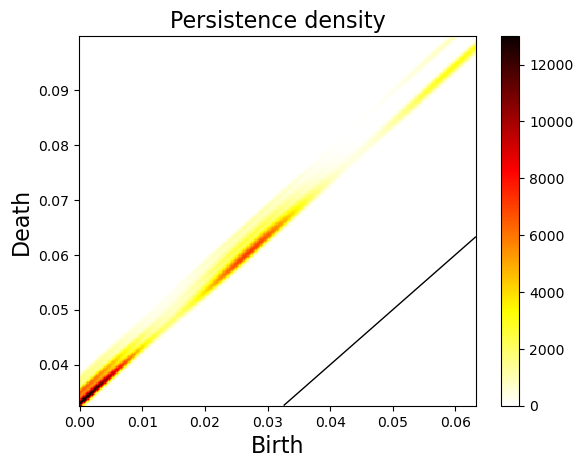

In [13]:
gudhi.plot_persistence_density(my_persistence, legend=True)
plot.show()